In [11]:
from sklearn.datasets import load_files
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras import optimizers
import tensorflow as tf
import numpy as np
from glob import glob


In [14]:
import os
PATH = os.path.join(os.path.dirname('dogImages'),'dogImages')
train_data_dir = os.path.join(PATH, 'train')
validation_data_dir = os.path.join(PATH, 'valid')
test_dir = os.path.join(PATH,'test')

In [5]:
#define a load funtion to load the data
def load_dataset(path):
    data = load_files(path)
    dog_file = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']),133)
    return dog_file,dog_targets

# load train,validation and test datasets
train,train_target = load_dataset('dogImages/train')
test,test_target = load_dataset('dogImages/test')
valid,valid_target = load_dataset('dogImages/valid')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("dogImages/train/*/"))]



In [6]:
# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train, valid, test])))
print('There are %d training dog images.' % len(train))
print('There are %d validation dog images.' % len(valid))
print('There are %d test dog images.'% len(test))

There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


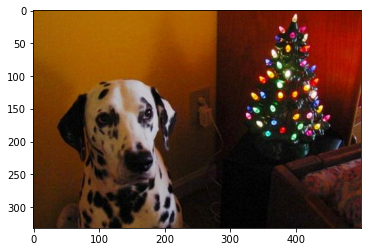

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as img
image = img.imread(train[1])
ims = plt.imshow(image)

In [8]:
import pandas as pd
target_1 = pd.DataFrame(train_target)

train_1 = pd.DataFrame(train)
def breed_finder(c):
    return c.split('/')[1].split('\\')[1].split('.')[1]
train_1['Breed'] = train_1[0].apply(breed_finder)
train_1.head()

,0,Breed
0,dogImages/train\095.Kuvasz\Kuvasz_06442.jpg,Kuvasz
1,dogImages/train\057.Dalmatian\Dalmatian_04054.jpg,Dalmatian
2,dogImages/train\088.Irish_water_spaniel\Irish_...,Irish_water_spaniel
3,dogImages/train\008.American_staffordshire_ter...,American_staffordshire_terrier
4,dogImages/train\008.American_staffordshire_ter...,American_staffordshire_terrier


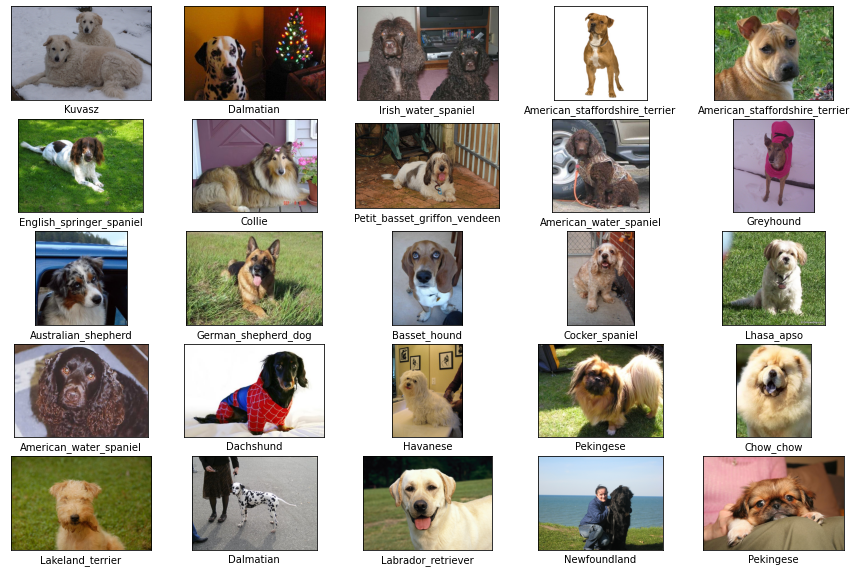

In [9]:
plt.figure(figsize=(15,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    image = img.imread(train_1[0][i])
    plt.imshow(image)
    plt.xlabel(train_1.Breed[i])
plt.show()

In [16]:
from PIL import Image,ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [18]:
nb_train_samples = 6680
nb_validation_samples = 835
epochs = 5
batch_size = 8
img_width, img_height = 150, 150

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


model1 = Sequential()
model1.add(Conv2D(32,(16,2),input_shape=input_shape, activation = 'relu'))
model1.add(MaxPooling2D())
model1.add(Conv2D(filters = 32, kernel_size = 2, activation = 'relu'))
model1.add(MaxPooling2D())
model1.add(Conv2D(filters = 64, kernel_size = 2, activation = 'relu'))
model1.add(MaxPooling2D())
model1.add(Conv2D(filters = 128, kernel_size = 2, activation = 'relu'))
model1.add(MaxPooling2D())
model1.add(GlobalAveragePooling2D())
model1.add(Dense(133,activation = 'softmax'))

model1.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


epochs = 10
checkp = ModelCheckpoint(filepath = 'weights.best.dog_1.hdf5',
                        verbose = 1, save_best_only = True)

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')



validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(img_width, img_height),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

model1.fit_generator(train_generator,
                    steps_per_epoch=nb_train_samples // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    callbacks = [checkp], verbose = 1)



Found 6680 images belonging to 133 classes.
Found 835 images belonging to 133 classes.
Epoch 1/10
835/835 [==============================] - 207s 247ms/step - loss: 0.6969 - accuracy: 0.0097 - val_loss: 0.6969 - val_accuracy: 0.0108

Epoch 00001: val_loss improved from inf to 0.69686, saving model to weights.best.dog_1.hdf5
Epoch 2/10
835/835 [==============================] - 199s 238ms/step - loss: 0.6969 - accuracy: 0.0108 - val_loss: 0.6968 - val_accuracy: 0.0097

Epoch 00002: val_loss improved from 0.69686 to 0.69685, saving model to weights.best.dog_1.hdf5
Epoch 3/10
835/835 [==============================] - 198s 237ms/step - loss: 0.6969 - accuracy: 0.0093 - val_loss: 0.6969 - val_accuracy: 0.0109

Epoch 00003: val_loss did not improve from 0.69685
Epoch 4/10
835/835 [==============================] - 197s 236ms/step - loss: 0.6969 - accuracy: 0.0106 - val_loss: 0.6969 - val_accuracy: 0.0121

Epoch 00004: val_loss did not improve from 0.69685
Epoch 5/10
835/835 [===============

After 250 epochs the accuracy increased to 30 percent . It took 11 hours for 250 epochs